In [63]:
from torch import nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
import torch
import torch.optim as optim
from sklearn.metrics import accuracy_score


In [64]:
data = load_breast_cancer()
X = data.data[:, [0, 1]]
y = data.target


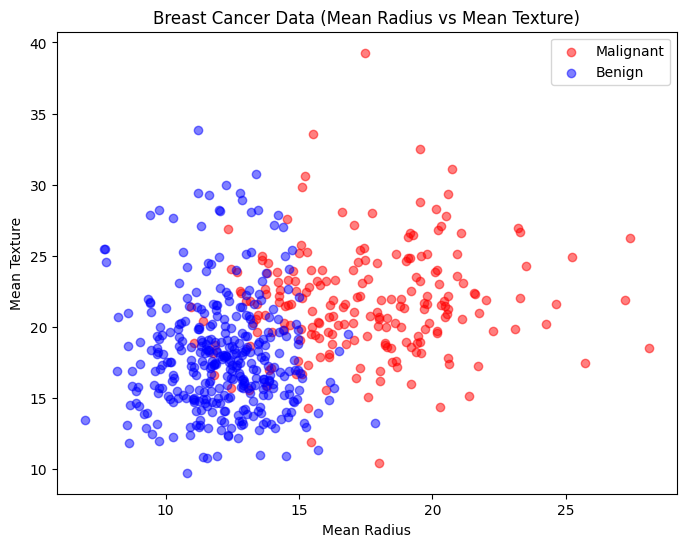

In [65]:
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red', label='Malignant', alpha=0.5)
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', label='Benign', alpha=0.5)
plt.xlabel('Mean Radius')
plt.ylabel('Mean Texture')
plt.title('Breast Cancer Data (Mean Radius vs Mean Texture)')
plt.legend()
plt.show()

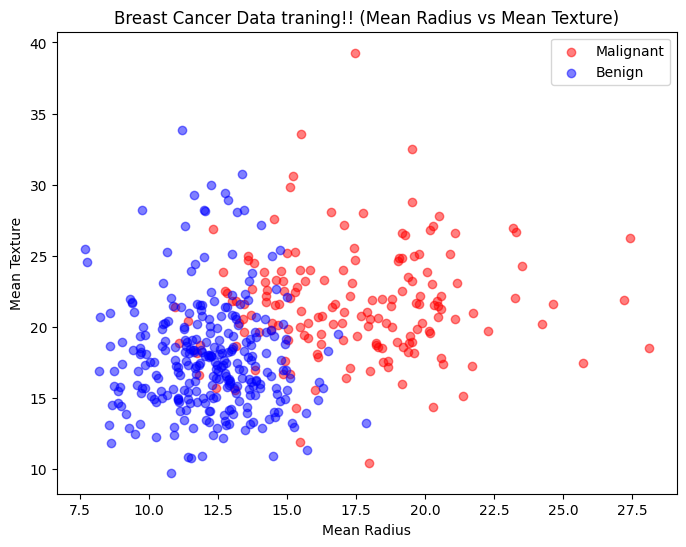

(torch.Size([455, 2]), torch.Size([455, 1]))

In [66]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

plt.figure(figsize=(8, 6))
plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], color='red', label='Malignant', alpha=0.5)
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], color='blue', label='Benign', alpha=0.5)
plt.xlabel('Mean Radius')
plt.ylabel('Mean Texture')
plt.title('Breast Cancer Data traning!! (Mean Radius vs Mean Texture)')
plt.legend()
plt.show()
X_train = torch.from_numpy(X_train).float()  
X_test = torch.from_numpy(X_test).float()
y_train = torch.from_numpy(y_train).float().view(-1, 1) 
y_test = torch.from_numpy(y_test).float().view(-1, 1)
X_train.shape, y_train.shape

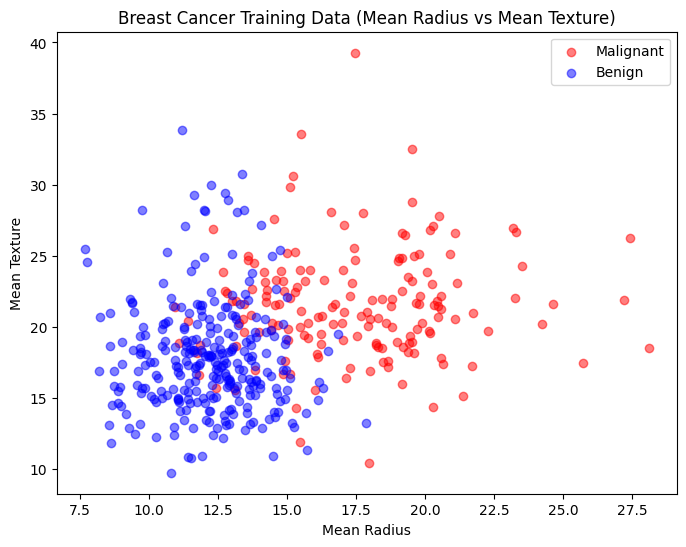

In [67]:
X_train_np = X_train.numpy()
y_train_np = y_train.numpy()
X_test_np = X_test.numpy()
y_test_np = y_test.numpy()
plt.figure(figsize=(8, 6))
plt.scatter(X_train_np[y_train_np.flatten() == 0, 0], X_train_np[y_train_np.flatten() == 0, 1], color='red', label='Malignant', alpha=0.5)
plt.scatter(X_train_np[y_train_np.flatten() == 1, 0], X_train_np[y_train_np.flatten() == 1, 1], color='blue', label='Benign', alpha=0.5)
plt.xlabel('Mean Radius')
plt.ylabel('Mean Texture')
plt.title('Breast Cancer Training Data (Mean Radius vs Mean Texture)')
plt.legend()
plt.show()


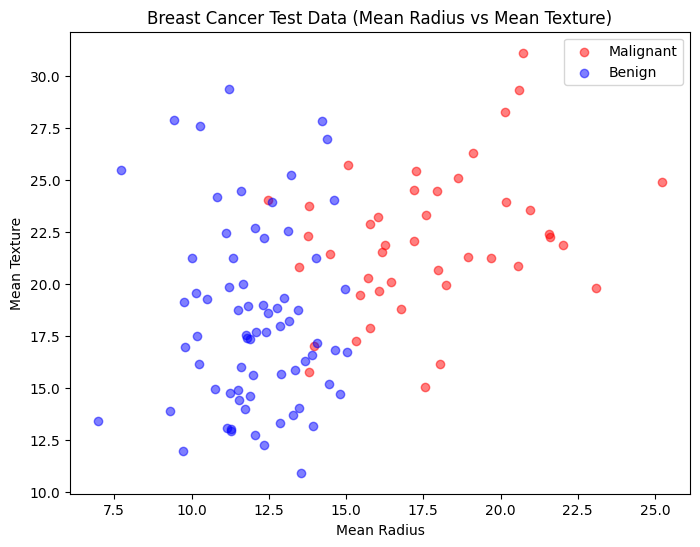

In [68]:
plt.figure(figsize=(8, 6))
plt.scatter(X_test_np[y_test_np.flatten() == 0, 0], X_test_np[y_test_np.flatten() == 0, 1], color='red', label='Malignant', alpha=0.5)
plt.scatter(X_test_np[y_test_np.flatten() == 1, 0], X_test_np[y_test_np.flatten() == 1, 1], color='blue', label='Benign', alpha=0.5)
plt.xlabel('Mean Radius')
plt.ylabel('Mean Texture')
plt.title('Breast Cancer Test Data (Mean Radius vs Mean Texture)')
plt.legend()
plt.show()

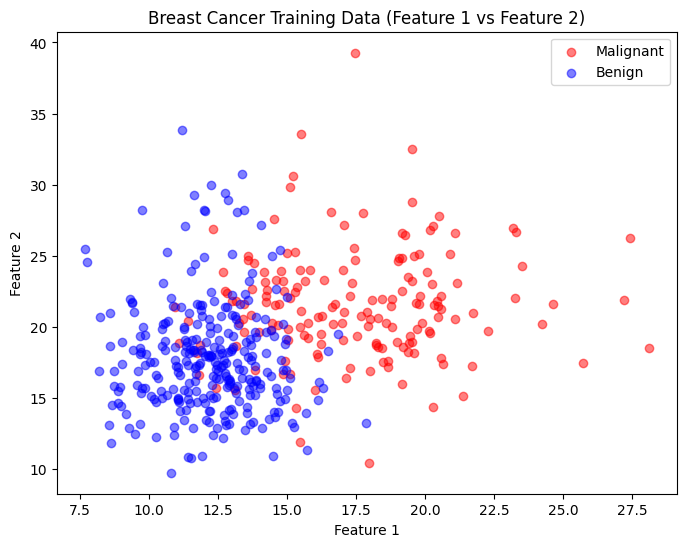

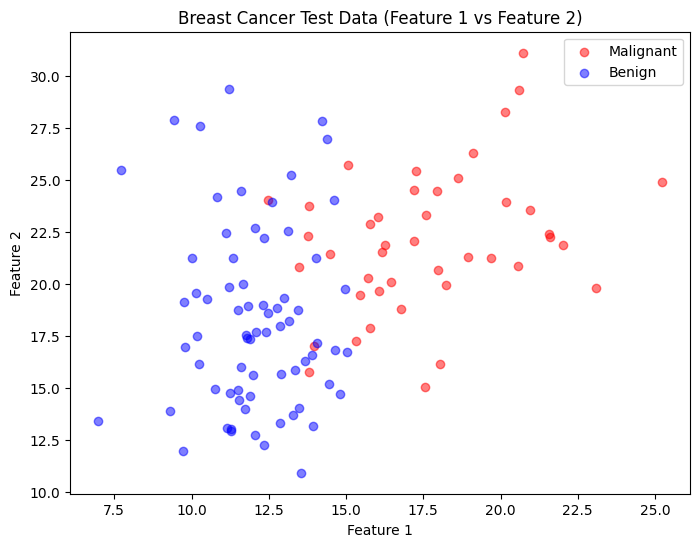

In [69]:
def plot_data(X, y, title):
    X_np = X.numpy()  
    y_np = y.numpy()
    plt.figure(figsize=(8, 6))
    plt.scatter(X_np[y_np.flatten() == 0, 0], X_np[y_np.flatten() == 0, 1], color='red', label='Malignant', alpha=0.5)
    plt.scatter(X_np[y_np.flatten() == 1, 0], X_np[y_np.flatten() == 1, 1], color='blue', label='Benign', alpha=0.5)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.legend()
    plt.show()

plot_data(X_train, y_train, 'Breast Cancer Training Data (Feature 1 vs Feature 2)')
plot_data(X_test, y_test, 'Breast Cancer Test Data (Feature 1 vs Feature 2)')

In [70]:
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(2, 16) 
        self.fc2 = nn.Linear(16, 1)  
    
    def forward(self, x):
        x = self.fc1(x)          
        x = torch.relu(x)        
        x = self.fc2(x)          
        x = torch.sigmoid(x)  
        return x

In [71]:
model = SimpleNN()
model.state_dict()
print(model.state_dict())

OrderedDict([('fc1.weight', tensor([[ 0.3327,  0.0422],
        [-0.3217, -0.4920],
        [-0.1816,  0.5113],
        [ 0.1068,  0.0282],
        [-0.1922,  0.2132],
        [-0.2161, -0.5649],
        [ 0.2719, -0.5644],
        [ 0.4726, -0.5678],
        [-0.5149, -0.0648],
        [ 0.3993, -0.6023],
        [ 0.1837,  0.3170],
        [-0.2624, -0.5794],
        [ 0.4807, -0.4158],
        [ 0.6185,  0.0136],
        [ 0.3007, -0.6520],
        [ 0.3814, -0.4183]])), ('fc1.bias', tensor([-0.5551, -0.1225, -0.6606,  0.3383, -0.6444,  0.2878,  0.3341,  0.0724,
         0.3146, -0.3550,  0.2319, -0.4352,  0.1296, -0.6534, -0.6955,  0.6750])), ('fc2.weight', tensor([[ 0.1899,  0.1448, -0.2177,  0.2279,  0.1074,  0.0888, -0.1640, -0.1283,
         -0.2423, -0.1103, -0.1730,  0.2491, -0.0389,  0.0257,  0.0227, -0.1715]])), ('fc2.bias', tensor([-0.1281]))])


In [72]:
loss_fn = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

epoch =100
epoch_count = []
loss_values = []
test_loss_values = []

for epoch in range(epoch):
    model.train()
    
    y_pred = model(X_train)  

    loss = loss_fn(y_pred, y_train) 
    loss_values.append(loss.item())

    optimizer.zero_grad() 
    loss.backward()  
    optimizer.step() 

    model.eval()

    with torch.inference_mode():
        test_preds = model(X_test)
        test_loss = loss_fn(test_preds, y_test)
        test_loss_values.append(test_loss.item())

        y_train_pred_labels = (y_pred > 0.5).float()
        y_test_pred_labels = (test_preds > 0.5).float()
        
        train_accuracy = accuracy_score(y_train.numpy(), y_train_pred_labels.numpy())
        test_accuracy = accuracy_score(y_test.numpy(), y_test_pred_labels.numpy())

        epoch_count.append(epoch)
    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item()}")
model.state_dict()


Epoch 0, Loss: 1.0901694297790527
Epoch 10, Loss: 0.7422640919685364
Epoch 20, Loss: 0.7109536528587341
Epoch 30, Loss: 0.689980149269104
Epoch 40, Loss: 0.6754659414291382
Epoch 50, Loss: 0.666246771812439
Epoch 60, Loss: 0.6604873538017273
Epoch 70, Loss: 0.6566831469535828
Epoch 80, Loss: 0.6538228988647461
Epoch 90, Loss: 0.6516157388687134


OrderedDict([('fc1.weight',
              tensor([[ 0.3122,  0.1143],
                      [-0.3217, -0.4920],
                      [-0.1733,  0.4576],
                      [ 0.0770,  0.1253],
                      [-0.2189,  0.2593],
                      [-0.2161, -0.5649],
                      [ 0.2719, -0.5644],
                      [ 0.4854, -0.5582],
                      [-0.5149, -0.0648],
                      [ 0.4004, -0.6016],
                      [ 0.1923,  0.2709],
                      [-0.2624, -0.5794],
                      [ 0.5244, -0.3710],
                      [ 0.6212,  0.0126],
                      [ 0.3007, -0.6520],
                      [ 0.4579, -0.3496]])),
             ('fc1.bias',
              tensor([-0.5426, -0.1225, -0.6681,  0.3567, -0.6346,  0.2878,  0.3341,  0.0727,
                       0.3146, -0.3550,  0.2249, -0.4352,  0.1292, -0.6555, -0.6955,  0.6727])),
             ('fc2.weight',
              tensor([[ 0.1429,  0.1448, -0.0542,  0

In [73]:
train_accuracy,test_accuracy


(0.6329670329670329, 0.6403508771929824)

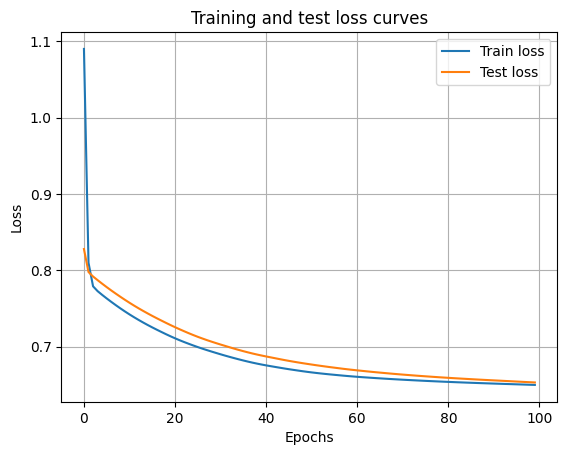

In [74]:

plt.plot(epoch_count, loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()
plt.grid(True)  
plt.show()